In [118]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(HH)

<module 'HH' from '/home/yaning/Documents/Spiking_NN/HH.py'>

In [119]:
# simulation environment
deltaTms = 0.05
Cm = 1
# other Vm initialisation can lead to random firing
Vm = 1.3458754117369027
# 5000 cycles and every cycle is 0.01ms
# in total 50ms
pointCount = 5000
voltages = np.empty(pointCount)
times = np.arange(pointCount) * deltaTms #record the actual time
stim = np.zeros(pointCount)
stim[1500:4000] = 20  # create a square pulse

# presynapse firing, for now has no meaning
tsp_pre = [500,2000,3500]



In [120]:
sodium_channel = HH.Voltage_Sodium(Vm)
potassium_channel = HH.Voltage_Potassium(Vm)
leaky_channel = HH.Voltage_Leak(Vm)

# because I am using factory, so the initialised values stay the same
# even the below line runs again
ampa_receptor = HH.LigandGatedChannelFactory.create_AMPA(Vm)

na_currents = []
k_currents = []
leak_currents = []
ampa_currents = []

include_ampa = 0

for i in range(len(times)):

    sodium_channel.update_gP(deltaTms)
    potassium_channel.update_gP(deltaTms)

    if include_ampa:
        ampa_receptor.update_gP(i, deltaTms, tsp_pre)

    # get the currents
    INa = sodium_channel.current()
    IK = potassium_channel.current()
    Ileak = leaky_channel.current()

    if include_ampa:
        Iampa = ampa_receptor.current()
        ampa_currents.append(Iampa)
    
    na_currents.append(INa)
    k_currents.append(IK)
    leak_currents.append(Ileak)

    
    # print(f"time is {i}")
    # print(f"INa is {INa}")
    # print(f"Iampa is {Iampa}")

    # sum the currents
    if include_ampa:
        Isum = stim[i] - INa - IK - Ileak -Iampa
    else:
        Isum = stim[i] - INa - IK - Ileak 

    Vm += deltaTms * Isum / Cm

    voltages[i] = Vm

    # update the voltages for each channel
    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm

    if include_ampa:
        ampa_receptor.Vm = Vm

        # when post synaptic fires weight updates
        if voltages[i-2] <= voltages[i-1] and voltages[i-1] >= voltages[i]:
            ampa_receptor.update_w(i)
            print(f"this is activated at {i}")




this line runs
this line runs
this line runs
0.2451603494963966
this line runs
this line runs
this line runs
0.2451603494963966
this line runs
this line runs
this line runs
0.2451603494963966


In [121]:
ampa_receptor.past_post

[]

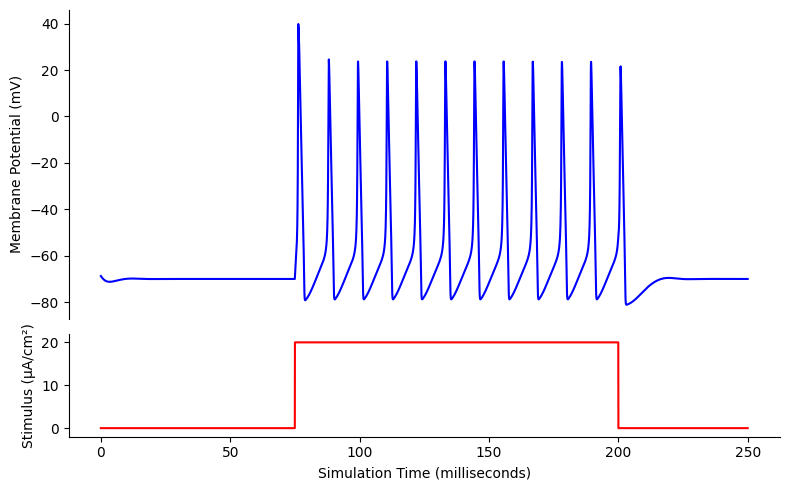

In [122]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("dev/concept4.png")
plt.show()

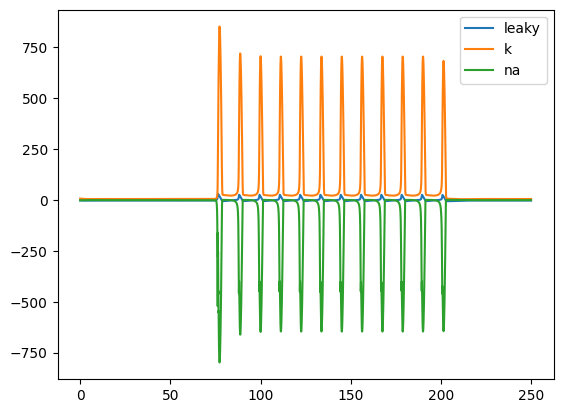

In [123]:
plt.plot(times, leak_currents, label="leaky")
plt.plot(times, k_currents, label="k")
plt.plot(times, na_currents, label="na")
plt.legend()